# <center>Projeto Final do Módulo V</center>
<center> Um breve estudo sobre gastos parlamentares Brasileiros

<center><img src='https://i.imgur.com/QLJaHpa.png' style="width:200px">

<center><a href="https://colab.research.google.com/github/Sartorio12/Projeto_Modulo_5/blob/main/notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo 5:** <a href="https://github.com/analumf" target="_blank">Analu Francisco</a> ; <a href="https://github.com/leticiafelippe" target="_blank">Letícia Felippe</a> ; <a href="https://github.com/sartorio12" target="_blank">Mateus Sartorio</a> ; <a href="www.linkedin.com/in/mateus-sartorio" target="blank">Mateus Sartório</a> ; <a href="https://github.com/hara0-tavares" target="_blank">Harão Tavares</a> ; <a href="https://github.com/jonathaslkc" target="_blank">Jonathas Carvalho</a>



<center><img src='https://i.imgur.com/QadqCNH.jpg' style="width:600px">
<center>Fonte: Agência Câmara de Notícias — Roque de Sá/Agência Senado

---

# **1.** Sobre o estudo e objetivos

O que você imagina quando ouve o conceito **"Cota Parlamentar"** ou **"Cota para o Exercício da Atividade Parlamentar (CEAP)"**?

Você sabia que é através da **CEAP** que deputados e senadores custeiam suas despesas em atividades parlamentares? O mais interessante disso, é que os dados da CEAP que iremos analisar hoje são abertos e podem ser acessados por qualquer pesso, ou seja, qualquer pessoa pode ver como os deputados e senadores utilizam essse tipo de recurso. 

Apesar de cobrir uma quantidade grande de despesas, os gastos com a CEAP devem seguir uma série de regras definidas pelo Ato da Mesa 43/2009. Isso quer dizer que os parlamentares não podem utilizar esses recursos de qualquer maneira. Alguns exemplos de gastos vedados são a aquisição de gêneros alimentícios (ex.: o parlamentar pode gastar com as suas refeições mas não pode comprar carne para o churrasco no fim de semana), gastos de caráter eleitoral e gastos com a participação em cursos de educação básica, graduação e pós-graduação.

Além disso, como citado anteriormente, a CEAP é destinada a custear gastos exclusivamente vinculados ao exercício da atividade parlamentar, o que veda o seu uso para o benefício de terceiros, como por exemplo, o pagamento de refeições para outras pessoas além do próprio parlamentar.
Apesar de todas essas regras, a fiscalização desses gastos é bastante falha, sendo comum o surgimento de denúncias sobre irregularidades.

Neste cenário surgiu um projeto chamado Operação Serenata de Amor ( https://serenata.ai/ ), que tem como objetivo utilizar ferramentas de ciência de dados para fiscalizar gastos públicos e compartilhar informações relevantes com o público. O projeto tem uma série de módulos. Alguns deles são responsáveis por baixar e limpar os dados, outros por identificar irregularidades e por fim existem alguns módulos responsáveis pela divulgação de eventuais alertas de irregularidades. Um desses módulos de divulgação é o bot @RosieDaSerenata, responsável por publicar alertas de irregularidades no Twitter.

<center><img src='https://i.imgur.com/AjyWlf1.jpg'>

**É sobre isso que vamos tratar nesta análise, que tem dois focos principais:**
- *Demonstrar como investigaremos esses dados utilizando Python.*
- *Elaborar conceitos a respeito da utilização da CEAP nos últimos 3 anos, com destaques no cenário de pandemia(COVID-19).*

#### <center> **Nós do grupo 5 esperamos que a leitura desse notebook seja esclarecedora e útil :)**

# **2.** Começando a nossa análise

Essa parte será um pouco teórica, pois nela exibiremos um pouco sobre a limpeza dos dados coletados no site da Câmara. Caso você queira somente acompanhar quais foram as nossas deduções baseadas nessas informações, pode pular para a parte X ( Preciso preencher a parte ).

*Antes de mais nada, vamos apresentar um glossário sobre o DataSet:*

- `Nome Parlamentar(txNomeParlamentar)` :  *Nome adotado pelo Parlamentar ao tomar posse do seu mandato.*
- `ideCadastro(Identificador Único do Parlamentar)` : *Número que identifica unicamente um deputado federal na CD.*
- `nuCarteiraParlamentar(Número da Carteira Parlamentar)` : *Documento usado para identificar um deputado federal na CD.*
- `nuLegislatura(Número da  Legislatura)` : *No contexto da cota CEAP, representa o ano base de início da legislatura.*
- `sgUF(Sigla da Unidade Federal)` : *Representa a UF do parlamentar.*
- `sdPartido(Sigla do Partido)` : *Representa o partido do parlamentar.*
- `codLegislatura(Código da Legislatura)` : *No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura.*
- `numSubCota(Número da Subcota) `: *Representa o código do Tipo de Despesa, comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.*
- `txtDescricao(Descrição da Subcota)` : *Descrição do Tipo de Despesa.*
- `numEspecificacaoSubCota(Número da Especificação da Subcota)` : *Representa o código desta especificação mais detalhada.*
- `txtDescricaoEspecificacao(Descrição da Especificação da Subcota)` : *Detalha o tipo de despesa efetuada.*
- `txtFornecedor(Fornecedor)` : *Representa o fornecedor do produto ou serviço presente no documento fiscal.*
- `txtCNPJCPF(CNPJ/CPF)` : *Indica se o fornecedor é CNPJ ou CPF , presente no documento fiscal.*
- `txtNumero(Número do Documento)` : *Indica o número do documento do emissor da NF em questão.*
- `indTipoDocumento(Indicativo de Tipo de Documento Fiscal)` : *Tipo de documento do fiscal – 0 para Nota Fiscal; 1 para Recibo; 2 para Despesa no Exterior.*
- `datEmissao(Data de Emissão)` : *A data de emissão do documento.*
- `vlrDocumento(Valor do Documento)` : *O seu conteúdo é o valor de face do documento fiscal ou o valor do documento que deu causa à despesa.*
- `vlrGlosa(Valor da Glosa)` : *Valor da glosa do documento que deu causa à despesa.*
- `vlrLiquido(Valor Liquido)` : *Valor líquido do documento (será calculado pela diferença entre o Valor do Documento e o Valor da Glosa)*
- `numMes(Mês) `: *Indica o mês da emissão da nota.*
- `numAno(Ano) `: *Indica o ano da emissão da nota.*
- `numParcela(Número da Parcela)` : *O seu conteúdo representa o número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.*
- `txtPassageiro(Nome do Passageiro)` : *O nome do passageiro, em caso da emissão do documento ser uma passagem aérea.*
- `txtTrecho(Trecho)` : *Representa qual o trecho da viagem, somente em casos de viagem aérea.*
- `numLote(Número do Lote) `: *Representa a capa do lote em que esse documento será incluído para ser entregue na Câmara para ressarcimento.*
- `numRessarcimento(Número do Ressarcimento) `: *Indica o ressarcimento do qual o documento faz parte.*
- `vlrRestituição(Valor da Restituição)` : *Indica o valor que será restituído sobre aquele documento.*
- `nuDeputadoId(Identificador do Solicitante)` : *Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.*

## **2.1.** Materiais e métodos

O presente trabalho foi desenvolvido utilizando `Google Colaboratory` e `Jupyter Notebook`, com a importação das seguintes bibliotecas:
> * `Pandas`: é uma biblioteca para uso em Python, open-source e de uso gratuito (sob uma licença BSD), que fornece ferramentas para análise e manipulação de dados. ;<br>
> * `Numpy`: é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray .;<br>
> * `Matplotlib`: é uma biblioteca com recursos para a geração de gráficos 2D a partir de arrays. Gráficos comuns podem ser criados com alta qualidade a partir de comandos simples, inspirados nos comandos gráficos do MATLAB;<br>
> * `Seaborn`: é uma biblioteca que atua em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada; e<br>
> * `Datetime`: é um módulo que fornece as classes para manipulação de datas e horas. Ainda que a aritmética de data e hora seja suportada, o foco da implementação é na extração eficiente do atributo para formatação da saída e manipulação.

A base de dados pode ser encontrada no site da Câmara (https://www.camara.leg.br/cota-parlamentar/), de acesso livre.

Para versionamento do código utilizamos o `Git` e `GitHub` para publicação do trabalho.

Para organização e acompanhamento das tarefas entre os integrantes do grupo foi utilizado o `Trello`.

As reuniões foram estabelecidas através da plataforma `Discord`.

## **2.2.** Importando nossas bibliotecas

A parte incial, simples importação de bibliotecas que serão utilizadas.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **2.3.** Importando nossos dados

In [133]:
df1 = pd.read_csv('Ano-2019.csv', sep=';')
df2 = pd.read_csv('Ano-2020.csv', sep=';')
df3 = pd.read_csv('Ano-2021.csv', sep=';')

In [134]:
#Concatenando os 3 arquivos em um único
df_unico = pd.concat([df1,df2,df3])
df_unico.shape

(555500, 31)

In [135]:
df_unico.sgPartido.value_counts()

PT               71008
PSL              67028
PP               44060
PL               38495
MDB              38487
PSD              36623
PSB              34907
PSDB             34371
REPUBLICANOS     29028
PDT              28706
DEM              27015
PTB              12719
SOLIDARIEDADE    12350
PODE             10574
CIDADANIA         9341
AVANTE            9257
PROS              8599
PSOL              8099
PCdoB             7288
PSC               6991
PATRIOTA          5951
NOVO              5829
PV                3761
PR                1118
REDE               708
PRB                531
S.PART.            377
PPS                225
PATRI              154
PHS                139
PPL                 20
Name: sgPartido, dtype: int64

In [136]:
# Criando uma cópia do dataframe como boa prática
df_copia = df_unico.copy()
df_copia.shape

(555500, 31)

In [137]:
# Nome das colunas
df_copia.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [138]:
# Tipo de dado de cada coluna
df_copia.dtypes

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [139]:
# Vendo todas as informações
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555500 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          555500 non-null  object 
 1   cpf                        553661 non-null  float64
 2   ideCadastro                553759 non-null  float64
 3   nuCarteiraParlamentar      553759 non-null  float64
 4   nuLegislatura              555500 non-null  int64  
 5   sgUF                       553759 non-null  object 
 6   sgPartido                  553759 non-null  object 
 7   codLegislatura             555500 non-null  int64  
 8   numSubCota                 555500 non-null  int64  
 9   txtDescricao               555500 non-null  object 
 10  numEspecificacaoSubCota    555500 non-null  int64  
 11  txtDescricaoEspecificacao  136177 non-null  object 
 12  txtFornecedor              555467 non-null  object 
 13  txtCNPJCPF                 53

observação: fizemos a consulta e achamos alguns valores nulos em algumas colunas mas achamos que elas não são relevantes pras consultas do nosso projeto.
è preciso analisar em grupo se devemos removê-las ou mantê-las.

In [140]:
# Procurando numero de dados nulos em percentual
round(df_copia.isnull().mean()*100,2)

txNomeParlamentar            0.00
cpf                          0.33
ideCadastro                  0.31
nuCarteiraParlamentar        0.31
nuLegislatura                0.00
sgUF                         0.31
sgPartido                    0.31
codLegislatura               0.00
numSubCota                   0.00
txtDescricao                 0.00
numEspecificacaoSubCota      0.00
txtDescricaoEspecificacao   75.49
txtFornecedor                0.01
txtCNPJCPF                   4.28
txtNumero                    0.00
indTipoDocumento             0.00
datEmissao                   2.82
vlrDocumento                 0.00
vlrGlosa                     0.00
vlrLiquido                   0.00
numMes                       0.00
numAno                       0.00
numParcela                   0.00
txtPassageiro               76.69
txtTrecho                   76.88
numLote                      0.00
numRessarcimento            67.45
vlrRestituicao              99.93
nuDeputadoId                 0.00
ideDocumento  

In [141]:
# o describe foi feito pra destacar os valores negativos presentes nas colunas:'vlrDocumento' e 'vlrLiquido' 
df_copia.describe()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,codLegislatura,numSubCota,numEspecificacaoSubCota,indTipoDocumento,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento
count,553661.00,553759.00,553759.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,555500.00,180842.00,364.00,555500.00,555500.00
mean,32084933829.49,166015.34,289.01,2018.89,55.97,250.66,0.25,1.03,884.41,3.90,808.74,6.08,2019.67,0.00,1130420.94,0.00,873.63,2734.36,5045073.02
std,29216245918.69,45864.51,153.13,0.64,0.16,412.07,0.46,1.57,2464.53,139.45,2464.25,3.34,0.78,0.02,787236.38,0.00,2367.57,773.34,2865349.90
min,1608657.00,4930.00,1.00,2015.00,55.00,1.00,0.00,0.00,-6605.57,0.00,-7821.20,1.00,2019.00,0.00,0.00,0.00,1.00,19.00,0.00
25%,6197277808.00,141531.00,160.00,2019.00,56.00,3.00,0.00,0.00,63.00,0.00,49.51,3.00,2019.00,0.00,0.00,0.00,6.97,2265.00,1705441.75
50%,22275150668.00,178938.00,292.00,2019.00,56.00,10.00,0.00,0.00,201.38,0.00,184.50,6.00,2019.00,0.00,1620007.50,0.00,26.11,3062.00,6888214.50
75%,50980351200.00,204449.00,424.00,2019.00,56.00,122.00,0.00,1.00,747.60,0.00,642.00,9.00,2020.00,0.00,1707915.25,0.00,277.39,3312.00,7075930.25
max,99898659149.00,217330.00,627.00,2019.00,56.00,999.00,4.00,4.00,172000.00,86000.00,151260.00,12.00,2021.00,1.00,1789366.00,0.00,20000.00,3487.00,7245337.00


observação: Achamos importante explicar o que são esses valores negativos ( compensação de passagens aéreas) conforme dicionário do arquivo.
https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml

In [142]:
# Visualizando as 5 primeiras linhas do dataframe
df_copia.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,693,4,2019-01-16T00:00:00,111.30,0.00,111.30,1,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,716,4,2019-02-04T00:00:00,117.19,0.00,117.19,2,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,723,4,2019-02-25T00:00:00,120.15,0.00,120.15,2,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,753,4,2019-03-28T00:00:00,151.18,0.00,151.18,3,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,PANIFICADORA FERREIRA NETO LTDA - EPP,037.139.030/0010-8,791,4,2019-05-07T00:00:00,119.90,0.00,119.90,5,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...


In [143]:
# Visualizando as cinco últimas linhas do dataframe
df_copia.tail()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
105600,Henrique do Paraíso,34709948895.00,217036.00,588.00,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,FABIO FRERICHS TREVISAN PUBLICIDADE,151.600.920/0014-4,00000140,0,2021-07-28T00:00:00,5000.00,0.00,5000.00,7,2021,0,NaN,NaN,1781785,NaN,NaN,3486,7228378,https://www.camara.leg.br/cota-parlamentar/doc...
105601,Henrique do Paraíso,34709948895.00,217036.00,588.00,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,LAR COMUNICAÇÃO VISUAL,328.697.980/0010-7,0000000024,0,2021-08-11T00:00:00,7000.00,0.00,7000.00,8,2021,0,NaN,NaN,1785880,NaN,NaN,3486,7237484,https://www.camara.leg.br/cota-parlamentar/doc...
105602,Henrique do Paraíso,34709948895.00,217036.00,588.00,2019,SP,REPUBLICANOS,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,0,NaN,LAR COMUNICAÇÃO VISUAL,328.697.980/0010-7,00000023,0,2021-07-29T00:00:00,4000.00,0.00,4000.00,7,2021,0,NaN,NaN,1782000,NaN,NaN,3486,7228945,https://www.camara.leg.br/cota-parlamentar/doc...
105603,Henrique do Paraíso,34709948895.00,217036.00,588.00,2019,SP,REPUBLICANOS,56,10,TELEFONIA,0,NaN,RAMAL,000.000.000/0000-6,7238253,0,NaN,1.10,0.00,1.10,7,2021,0,NaN,NaN,0,0.00,NaN,3486,0,NaN
105604,DaLua do Rota,51172593272.00,217330.00,590.00,2019,AP,PSC,56,10,TELEFONIA,0,NaN,RAMAL,000.000.000/0000-6,7238253,0,NaN,1.08,0.00,1.08,7,2021,0,NaN,NaN,0,0.00,NaN,3487,0,NaN


In [144]:
# Buscamos amostra aleatória de cinco linhas
df_copia.sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
169461,Giovani Feltes,26586568072.00,178996.00,494.00,2019,RS,MDB,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO TEXAS EIRELLI,319.594.960/0015-9,45017,4,2019-06-02T00:00:00,277.88,0.00,277.88,6,2019,0,NaN,NaN,1603896,NaN,NaN,2970,6850173,http://camara.leg.br/cota-parlamentar/nota-fis...
1945,Celso Russomanno,1252958803.00,73441.00,347.00,2019,SP,REPUBLICANOS,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,COMERCIO VAREJISTA DE COMBUSTIVEIS RT DEZOITO E M,180.116.960/0011-7,349708,0,2021-04-27T00:00:00,50.00,0.00,50.00,4,2021,0,NaN,NaN,1765857,NaN,NaN,993,7195494,https://www.camara.leg.br/cota-parlamentar/doc...
64234,Célio Moura,12364983134.00,204370.00,62.00,2019,TO,PT,56,122,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",0,NaN,UBER DO BRASIL TECNOLOGIA LTDA.,178.956.460/0018-7,s n,1,2021-06-25T00:00:00,10.96,1.00,9.96,6,2021,0,NaN,NaN,1777732,NaN,NaN,3203,7219498,https://www.camara.leg.br/cota-parlamentar/doc...
251076,David Soares,2112481770.00,204511.00,356.00,2019,SP,DEM,56,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,Veículos Automotores,AUTO POSTO AEROPORTO LTDA,082.021.160/0011-5,425176,4,2019-03-11T00:00:00,150.00,0.00,150.00,3,2019,0,NaN,NaN,1573478,NaN,NaN,3227,6778575,http://camara.leg.br/cota-parlamentar/nota-fis...
48247,Fernando Monteiro,83146270463.00,92699.00,146.00,2019,PE,PP,56,999,PASSAGEM AÉREA - RPA,0,NaN,Cia Aérea - TAM,020.128.620/0016-0,Bilhete: 957-2114.546894,0,2019-10-22T00:00:00,865.57,0.00,865.57,10,2019,0,MARIARA CARLOS DA SILVA,BSB/REC,0,0.00,NaN,3090,1710970,NaN


In [145]:
# Essa consulta fizemos um novo df, filtrando na coluna 'txtDescricao' valores diferentes de 'PASSAGEM AÉREA - RPA'  e 'PASSAGEM AÉREA - SIGEPA' e a partir desse novo df fazer os cálculos de despesas.
valores = df_copia[(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - RPA')&(df_copia['txtDescricao'] != 'PASSAGEM AÉREA - SIGEPA')]
valores['txtDescricao'].unique()
valores.vlrLiquido

0         111.30
1         117.19
2         120.15
3         151.18
4         119.90
           ...  
105600   5000.00
105601   7000.00
105602   4000.00
105603      1.10
105604      1.08
Name: vlrLiquido, Length: 427074, dtype: float64

In [146]:
# os dois valores negativos da coluna 'VrlLiquido'
valores.query('vlrLiquido < 0')['vlrLiquido']

23210    -868.00
28211   -1762.66
Name: vlrLiquido, dtype: float64

In [147]:
# Convertemos a coluna datEmissao de object para datatime e colocamos só pra mostrar o formato dia/mes/ano pq o horário é irrelevante para as consultas
df_copia['datEmissao'] = pd.to_datetime(df_copia['datEmissao'], format = '%Y/%m/%d')
df_copia['datEmissao']

0        2019-01-16
1        2019-02-04
2        2019-02-25
3        2019-03-28
4        2019-05-07
            ...    
105600   2021-07-28
105601   2021-08-11
105602   2021-07-29
105603          NaT
105604          NaT
Name: datEmissao, Length: 555500, dtype: datetime64[ns]

In [148]:
#Conferindo se o type da data foi transformado
df_copia.dtypes

txNomeParlamentar                    object
cpf                                 float64
ideCadastro                         float64
nuCarteiraParlamentar               float64
nuLegislatura                         int64
sgUF                                 object
sgPartido                            object
codLegislatura                        int64
numSubCota                            int64
txtDescricao                         object
numEspecificacaoSubCota               int64
txtDescricaoEspecificacao            object
txtFornecedor                        object
txtCNPJCPF                           object
txtNumero                            object
indTipoDocumento                      int64
datEmissao                   datetime64[ns]
vlrDocumento                        float64
vlrGlosa                            float64
vlrLiquido                          float64
numMes                                int64
numAno                                int64
numParcela                      

In [149]:
df_copia.shape

(555500, 31)

In [150]:
# df_copia[df_copia['cpf'].isnull()]
df_copia.isnull().sum()


txNomeParlamentar                 0
cpf                            1839
ideCadastro                    1741
nuCarteiraParlamentar          1741
nuLegislatura                     0
sgUF                           1741
sgPartido                      1741
codLegislatura                    0
numSubCota                        0
txtDescricao                      0
numEspecificacaoSubCota           0
txtDescricaoEspecificacao    419323
txtFornecedor                    33
txtCNPJCPF                    23790
txtNumero                         0
indTipoDocumento                  0
datEmissao                    15650
vlrDocumento                      0
vlrGlosa                          0
vlrLiquido                        0
numMes                            0
numAno                            0
numParcela                        0
txtPassageiro                426007
txtTrecho                    427074
numLote                           0
numRessarcimento             374658
vlrRestituicao              

In [151]:
df_copia['txNomeParlamentar'].str.contains('LIDMIN', na=False)

0         False
1         False
2         False
3         False
4         False
          ...  
105600    False
105601    False
105602    False
105603    False
105604    False
Name: txNomeParlamentar, Length: 555500, dtype: bool

In [152]:
sem_partido_sem_uf = valores[valores['sgUF'].isnull()][['txNomeParlamentar', 'sgUF', 'sgPartido','vlrLiquido']]

sem_partido_sem_uf

,txNomeParlamentar,sgUF,sgPartido,vlrLiquido
0,LID.GOV-CD,NaN,NaN,111.30
1,LID.GOV-CD,NaN,NaN,117.19
2,LID.GOV-CD,NaN,NaN,120.15
3,LID.GOV-CD,NaN,NaN,151.18
4,LID.GOV-CD,NaN,NaN,119.90
...,...,...,...,...
439,LIDMIN,NaN,NaN,4000.00
440,LIDMIN,NaN,NaN,137.97
441,LIDMIN,NaN,NaN,175.18
442,LIDMIN,NaN,NaN,3800.00


In [153]:
sem_partido_sem_uf['txNomeParlamentar'].value_counts()

LIDERANÇA DO PT                                     515
LIDERANÇA DO PTB                                    169
LIDERANÇA DO PSDB                                   168
LIDERANÇA DO PODEMOS                                140
LIDERANÇA DO SOLIDARIEDADE                          137
LIDERANÇA DO PSD                                    104
LIDERANÇA DO NOVO                                    94
LIDERANÇA DO DEMOCRATAS                              75
LIDERANÇA DO CIDADANIA                               68
LIDMIN                                               67
LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL     51
LIDERANÇA DO AVANTE                                  49
LIDERANÇA DO PDT                                     36
LIDERANÇA DO PSL                                     29
LID.GOV-CD                                           15
LIDERANÇA DO PSOL                                    14
LIDERANÇA DO PROGRESSISTAS                           10
Name: txNomeParlamentar, dtype: int64

In [154]:
df_unico.sgUF.value_counts()

SP    83873
MG    65193
RJ    50674
RS    48467
BA    43331
PR    41816
PE    28292
SC    19900
CE    19632
MA    14412
PA    14402
PB    12727
GO    11315
RN    10183
ES     9516
TO     9378
MT     9260
MS     7970
RO     7512
PI     7284
AC     6702
AL     6629
SE     6124
AM     5723
RR     5405
AP     5216
DF     2823
Name: sgUF, dtype: int64

In [155]:
#Atribuindo os paritdo correspondentes as despesas atribuídas apenas a lideranças
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PTB", 'PTB', valores.sgPartido) 
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PSDB", 'PSDB', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PODEMOS", 'PODEMOS', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO SOLIDARIEDADE", 'SOLIDARIEDADE', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PSD", 'PSD', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO NOVO", 'NOVO', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO DEMOCRATAS", 'DEMOCRATAS', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO CIDADANIA", 'CIDADANIA', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO AVANTE", 'AVANTE', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PDT", 'PDT', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PSOL", 'PSOL', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PROGRESSISTAS", 'PROGRESSISTAS', valores.sgPartido)
valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PARTIDO REPUBLICANO DA ORDEM SOCIAL", 'SOCIAL', valores.sgPartido)

<ipython-input-155-59fde47e44f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PSL", 'PSL', valores.sgPartido)
<ipython-input-155-59fde47e44f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores['sgPartido'] = np.where(valores['txNomeParlamentar'] == "LIDERANÇA DO PT", 'PT', valores.sgPartido)
<ipython-input-155-59fde47e44f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [156]:
#Verificando o funcionamento da atribuição
valores[valores['txNomeParlamentar'].str.match('LIDERANÇA')].sample(5)

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
255,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,PT,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,MAP COMERCIO,053.220.900/0015-0,30842,4,2021-03-15T00:00:00,190.00,0.00,190.00,3,2021,0,NaN,NaN,1756119,NaN,NaN,2439,7174794,http://camara.leg.br/cota-parlamentar/nota-fis...
33,LIDERANÇA DO NOVO,NaN,NaN,NaN,2019,NaN,NOVO,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,NaN,Sólides Tecnologia S/A,104.613.020/0011-0,202000000020173,0,2020-10-01T00:00:00,563.90,0.00,563.90,9,2020,0,NaN,NaN,1724076,NaN,NaN,3441,7109244,NaN
637,LIDERANÇA DO PT,NaN,NaN,NaN,2019,NaN,PT,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,M.E. CARDOSO RESTAURANTE E LANCHONETE,090.170.420/0010-0,274,4,2019-10-23T00:00:00,580.00,0.00,580.00,10,2019,0,NaN,NaN,1646344,NaN,NaN,2439,6947229,http://camara.leg.br/cota-parlamentar/nota-fis...
18,LIDERANÇA DO AVANTE,NaN,NaN,NaN,2019,NaN,AVANTE,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,JANE DA SILVA SOARES DE AVELAR 57915873172,277.575.530/0014-0,001351492,0,2019-06-26T00:00:00,1200.00,0.00,1200.00,6,2019,0,NaN,NaN,1609551,NaN,NaN,3175,6863850,https://www.camara.leg.br/cota-parlamentar/doc...
371,LIDERANÇA DO PSDB,NaN,NaN,NaN,2019,NaN,PSDB,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,M LELIS CAFETERIA LTDA ME,118.135.380/0013-1,11773,0,2019-03-26T00:00:00,550.00,0.00,550.00,3,2019,0,NaN,NaN,1579952,NaN,NaN,2442,6791386,https://www.camara.leg.br/cota-parlamentar/doc...


# A fazer:
- Preencher valores NaN com valores padrões (Em alguns campos, não temos CPF por exemplo, por se tratar de uma secretaria pedindo verba para algo)
- 

### Análise dos DataFrames ( Harão e Jonathas)

In [157]:
#Criando uma cópia para trabalharmos nas questões e realizar as análises devidas

#pd.set_option('display.max_columns', None)
#pd.options.display.float_format = '{:.2f}'.format
#float(number.replace(',', '.'))

df_2 = df_copia.copy()

***1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?***

In [158]:
#Criando dataframes separados por ano
df2019 = df_2[df_2['numAno'] == 2019]
df2020 = df_2[df_2['numAno'] == 2020]
df2021 = df_2[df_2['numAno'] == 2021]

In [ ]:
#Imprimindo total de gastos nos três anos
print(f"Total no período R$ {df_2['vlrDocumento'].sum():,.2f}")

In [ ]:
#Soma de gastos agrupados por mês de cada ano
df2019.groupby(['numMes'])['vlrDocumento'].sum()

In [ ]:
df2020.groupby(['numMes'])['vlrDocumento'].sum()

In [343]:
#2021 até julho mais alguns dias de agosto
df2021.groupby(['numMes'])['vlrDocumento'].sum()

numMes
1   12883504.64
2   15504068.70
3   14859519.73
4   14947054.49
5   15865528.96
6   14690740.05
7   12383295.66
8    3532848.83
Name: vlrDocumento, dtype: float64

In [163]:
#Criando uma cópia do dataframe de 2021 para acrescentar os demais meses restantes para criação correta do gráfico seguinte
df2021_copia = df2021.copy()
df2021_copia = df2021_copia.append({'numMes':9}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':10}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':11}, ignore_index = True)
df2021_copia = df2021_copia.append({'numMes':12}, ignore_index = True)
df2021_copia['numMes'] = df2021_copia['numMes'].astype('int64')

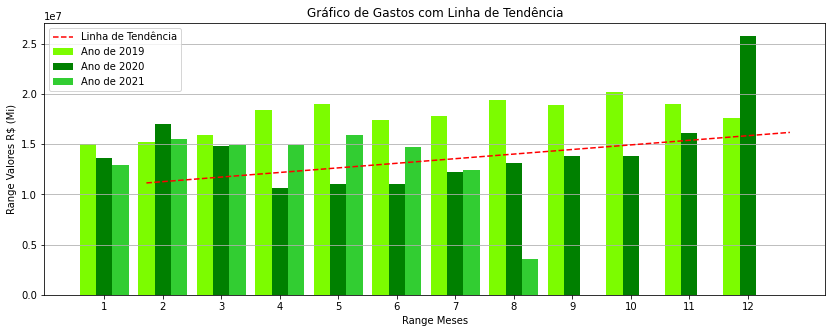

In [344]:
#Gráfico agrupado por mês, com gráfico de barra dos três anos, com linha de tendência (média)
plt.figure(figsize = (14, 5))
wid = 0.28
r1 = np.arange(len(df2019['numMes'].unique()))
r2 = [x + wid for x in r1]
r3 = [x + wid for x in r2]

z = np.polyfit(df_2['numMes'].sort_values().unique(), (df_2.groupby(['numMes'])['vlrDocumento'].sum().sort_values())/3, 1)
p = np.poly1d(z)
plt.plot(df_2['numMes'].sort_values().unique(), p(df_2['numMes'].sort_values().unique()), 'r--', label = 'Linha de Tendência')

plt.bar(r1, df2019.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2019', color = '#7CFC00')
plt.bar(r2, df2020.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2020', color = '#008000')
plt.bar(r3, df2021_copia.groupby(['numMes'])['vlrDocumento'].sum(), width = wid, label = 'Ano de 2021', color = '#32CD32')

#plt.xticks([r + wid for r in range(df19['numMes'].unique())], ['2019', '2020'])
plt.xticks([r + wid for r in range(len(df2019['numMes'].unique()))], df2019['numMes'].sort_values().unique())

plt.title('Gráfico de Gastos com Linha de Tendência')
plt.xlabel('Range Meses')
plt.ylabel('Range Valores R$ (Mi)')

plt.legend()
plt.grid(axis = 'y')
plt.show()

Conforme é possível analisar em 2019, antes da pandemia, os gastos totais dos parlamentares iniciam com R$ 15.031.911,98, seguindo com os meses seguintes em tendência de alta, alcançando a casa dos 20mi no mês de outubro de 2019. Acompanhando a virada de ano, e, conforme cenário no período, défict nos gastos aproximando da casa dos 10mi. O destaque é para o mês de dezembro de 2020, onde estourou a faixa dos 25mi.

***2. Qual a média de gastos por parlamentar?***

In [335]:
#Média de gastos agrupada por parlamentar
mean = df_2.groupby(['txNomeParlamentar'])['vlrDocumento'].mean()
mean

txNomeParlamentar
ABEL MESQUITA JR.      3063.72
ADAIL CARNEIRO         4224.91
ADALBERTO CAVALCANTI   2338.89
ADELMO CARNEIRO LEÃO   1289.62
ADELSON BARRETO         871.04
                         ...  
Zé Silva                678.70
Zé Vitor                847.64
Átila Lins             2016.82
Átila Lira             1605.24
Áurea Carolina          706.96
Name: vlrDocumento, Length: 846, dtype: float64

***3. Quais foram os parlamentares que mais e que menos consumiram
recursos?***

In [353]:
#Criaçao de um dataframe excluíndo os dados negativos de valor, e criando agrupamento ordenado por soma de gastos
df_2_2 = df_2[df_2['vlrDocumento'] >= 0]
menos_gast = df_2_2.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values().head(5)
menos_gast

txNomeParlamentar
LUCIANA SANTOS   0.49
MANDETTA         0.60
DaLua do Rota    1.08
SARNEY FILHO     1.25
ROCHA            2.53
Name: vlrDocumento, dtype: float64

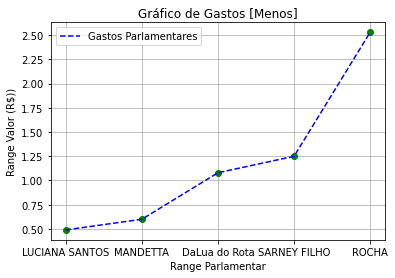

In [364]:
plt.plot(menos_gast.index, menos_gast, 'go')
plt.plot(menos_gast.index, menos_gast, 'b--', label = 'Gastos Parlamentares')

plt.xticks(menos_gast.index)

plt.title('Gráfico de Gastos [Menos]')
plt.xlabel('Range Parlamentar')
plt.ylabel('Range Valor (R$))')

plt.legend()
plt.grid(True)
plt.show()

In [365]:
#Agrupamento de gastos de parlamentar do maior para menor
mais_gast = df_2.groupby(['txNomeParlamentar'])['vlrDocumento'].sum().sort_values(ascending = False).head(5)
mais_gast

txNomeParlamentar
Jéssica Sales        1416133.42
Wellington Roberto   1385090.81
Perpétua Almeida     1376839.42
Silas Câmara         1373755.01
Jesus Sérgio         1360451.70
Name: vlrDocumento, dtype: float64

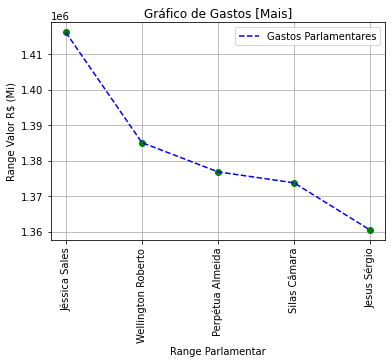

In [373]:
plt.plot(mais_gast.index, mais_gast, 'go')
plt.plot(mais_gast.index, mais_gast, 'b--', label = 'Gastos Parlamentares')

plt.xticks(mais_gast.index, rotation = 90)

plt.title('Gráfico de Gastos [Mais]')
plt.xlabel('Range Parlamentar')
plt.ylabel('Range Valor R$ (Mi)')

plt.legend()
plt.grid(True)
plt.show()

***4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?***

In [389]:
#Agrupamento de gastos por categoria, somando o total e ordenando do maior para o menor
categoria_oner = df_2.groupby(['txtDescricao'])['vlrDocumento'].sum().sort_values(ascending = True)
categoria_oner

txtDescricao
PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR              153953.49
PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS                    194014.25
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                           445000.00
ASSINATURA DE PUBLICAÇÕES                                      583249.07
SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO                     1836470.03
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                    2023309.49
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.      2617690.65
LOCAÇÃO OU FRETAMENTO DE AERONAVES                            3542367.00
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.        3610273.25
SERVIÇOS POSTAIS                                              3998291.44
PASSAGEM AÉREA - REEMBOLSO                                    5917360.89
TELEFONIA                                                    12379990.43
PASSAGEM AÉREA - SIGEPA                                      20605815.87
COMBUSTÍVEIS E LUBRIFICANTES.         

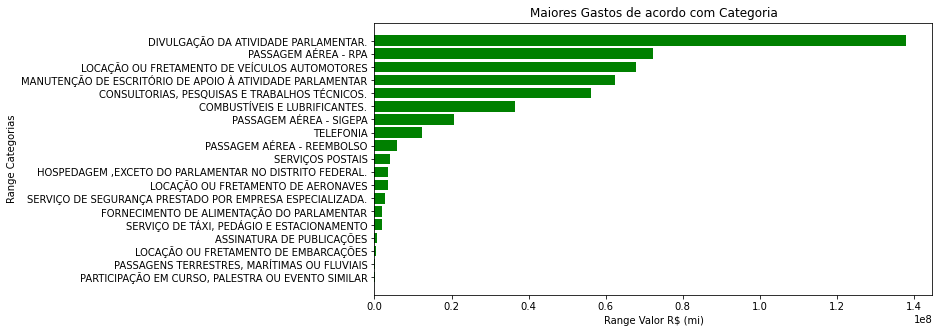

In [390]:
#Plotando gráfico barras na horizontal para meior visualização
plt.figure(figsize = (10, 5))
plt.barh(categoria_oner.index, categoria_oner, color = 'g')

#plt.xticks(categoria_oner.index)

plt.title('Maiores Gastos de acordo com Categoria')
plt.xlabel('Range Valor R$ (mi)')
plt.ylabel('Range Categorias')

plt.show()

In [410]:
categoria_oner2 = df_2.groupby(['txtDescricao'])['vlrDocumento'].sum().head().sort_values(ascending = True)
categoria_oner2

txtDescricao
ASSINATURA DE PUBLICAÇÕES                          583249.07
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR        2023309.49
COMBUSTÍVEIS E LUBRIFICANTES.                    36439982.54
CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.    56271421.37
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.            137902334.12
Name: vlrDocumento, dtype: float64

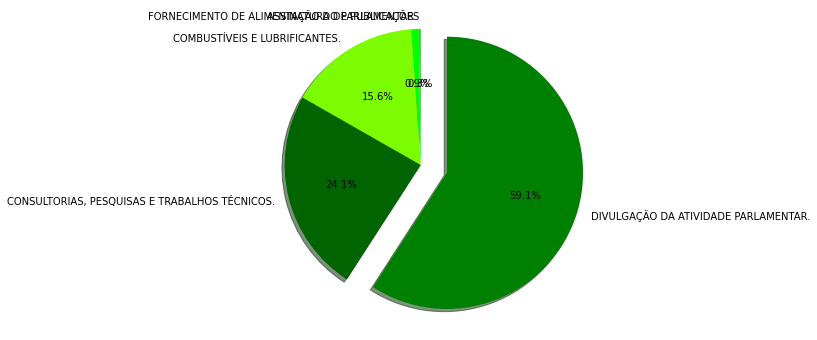

In [415]:
#Plotando em gráfico com porcentagem para melhor visualização
labels = categoria_oner2.index
sizes = categoria_oner2

explode = (0, 0, 0, 0, 0.2)

fig1, ax1 = plt.subplots(figsize=(6, 6))

cc = ['#32CD32', '#00FF00', '#7CFC00', '#006400', '#008000']

ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = cc)

ax1.axis('equal')
plt.show()

***5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?***

In [377]:
#Agrupamento da contagem de viagens por trecho, as 5 maiores
trechos_recorr = df_2.groupby(['txtTrecho'])['txtTrecho'].count().sort_values(ascending = False).head(5)
trechos_recorr

txtTrecho
BSB/BSB    9890
BSB/CGH    5083
CGH/BSB    4912
BSB/SDU    4134
SDU/BSB    3987
Name: txtTrecho, dtype: int64

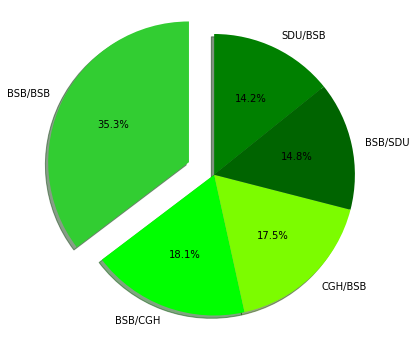

In [378]:
#Plotando em gráfico com porcentagem para melhor visualização
labels = trechos_recorr.index
sizes = trechos_recorr

explode = (0.2, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(6, 6))

cc = ['#32CD32', '#00FF00', '#7CFC00', '#006400', '#008000']

ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90, colors = cc)

ax1.axis('equal')
plt.show()

***6. Qual a média de gastos por estado?***

In [379]:
#Média de gastos por estados
media_estados = df_2.groupby(['sgUF'])['vlrDocumento'].mean().sort_values()
media_estados

sgUF
SC    564.02
RS    568.06
MG    690.85
PR    691.59
SP    692.75
RJ    803.59
MT    805.57
RN    847.52
PE    868.56
RO    869.16
MS    912.58
TO    920.31
ES    936.42
BA    979.92
PB   1075.31
CE   1245.68
PA   1257.20
GO   1285.13
MA   1376.81
SE   1431.70
AL   1473.46
PI   1495.36
DF   1553.38
AC   1601.27
AM   1606.10
RR   1664.40
AP   1944.97
Name: vlrDocumento, dtype: float64

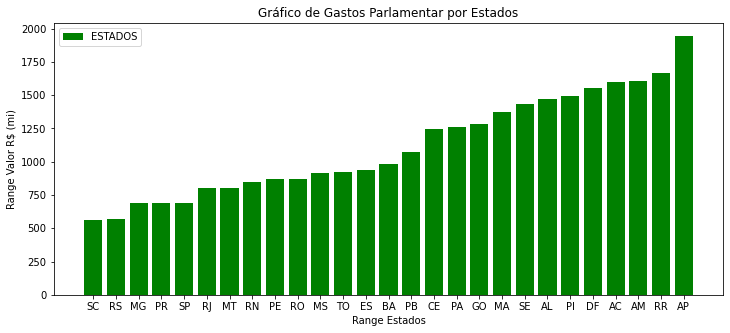

In [380]:
#Plotando em gráfico de barras a média dos estados, na ordem do maior para menor
plt.figure(figsize = (12, 5))
plt.bar(media_estados.index, media_estados, color = 'g', label = 'ESTADOS')
#plt.plot(media_estados.index, media_estados, 'r--')

#plt.xticks(media_estados.index)
plt.title('Gráfico de Gastos Parlamentar por Estados')
plt.xlabel('Range Estados')
plt.ylabel('Range Valor R$ (mi)')

plt.legend()
plt.show()